                                        Elevvo.tech                                                   
                            Machine learning Internship Tasks                                
                                    Due Date: 25th August 2025                                                 

---

                                  Muhammad Usman Fakhar                                                               
                                Machine learning tracks                                                    
                                                                                          

---

In [281]:
2+2

4

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [283]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive - Higher Education Commission\Desktop\Evolvo Internship\Task # 02\loan_approval_dataset.csv")

In [284]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [285]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [287]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [288]:
df.shape

(4269, 13)

In [289]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [290]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [291]:
df.columns.tolist()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

In [292]:
df.columns = df.columns.str.strip()

In [293]:
catigorical_cols = [col for col in df.columns if df[col].dtype == 'O']
for col in catigorical_cols:
    print(f'{col} : {df[col].unique()}')    

education : [' Graduate' ' Not Graduate']
self_employed : [' No' ' Yes']
loan_status : [' Approved' ' Rejected']


In [294]:
for col in catigorical_cols:
    print(df[col].value_counts()/len(df)*100)
    print()

education
Graduate        50.222535
Not Graduate    49.777465
Name: count, dtype: float64

self_employed
Yes    50.363083
No     49.636917
Name: count, dtype: float64

loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64



                                    Task # 02 Visualization                             

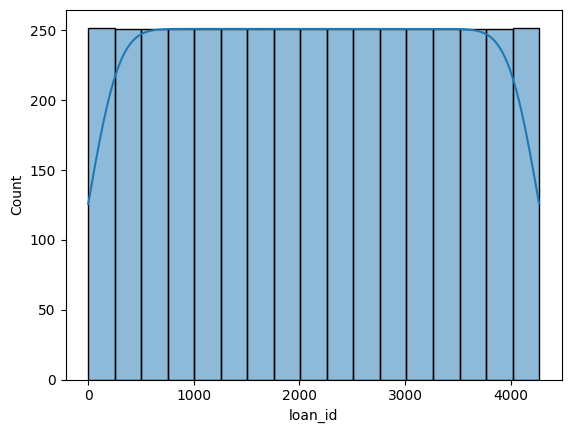

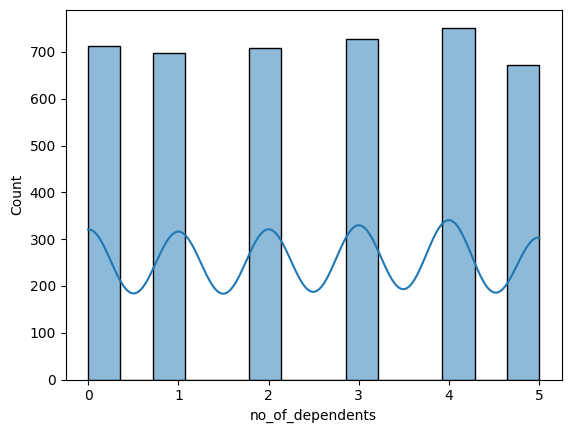

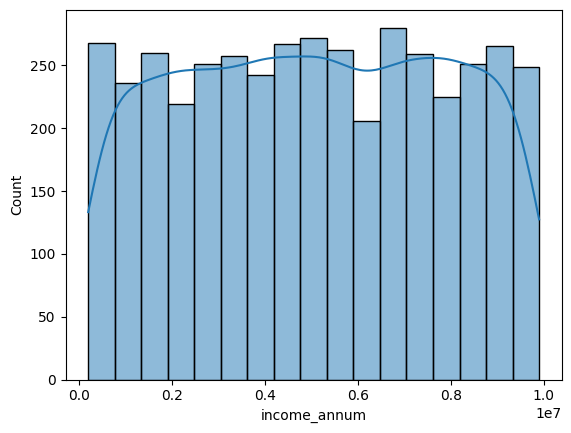

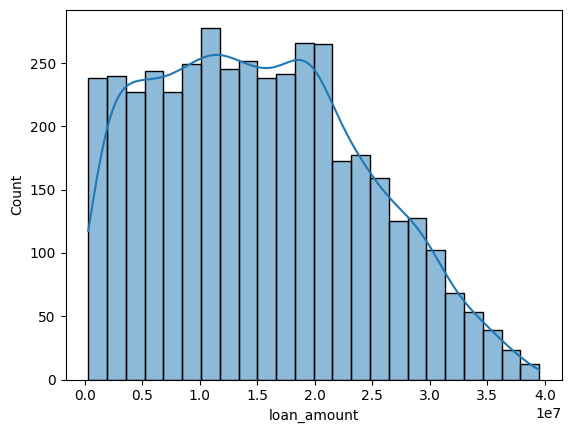

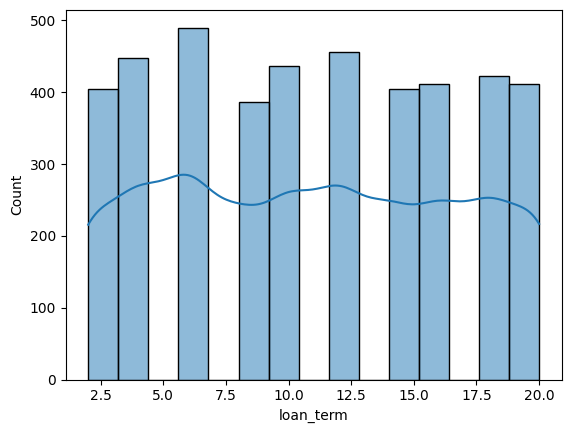

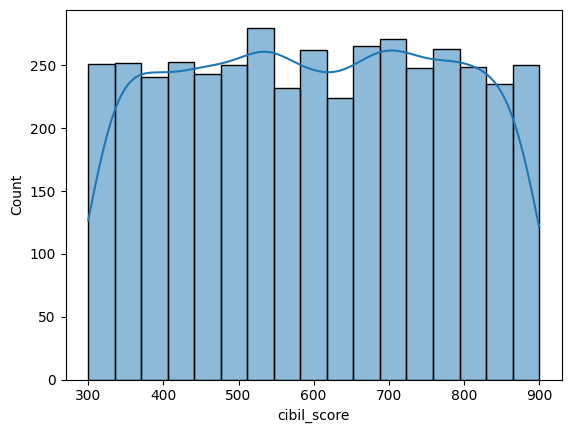

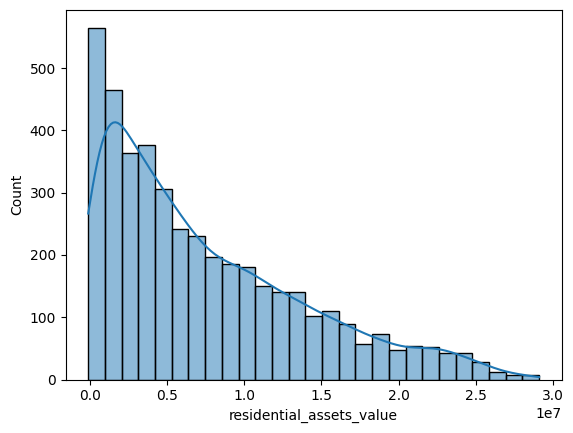

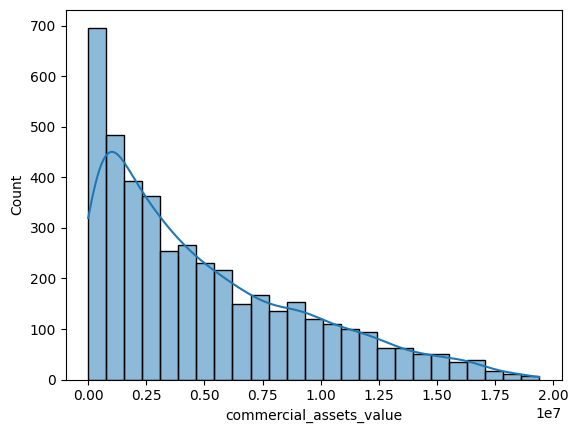

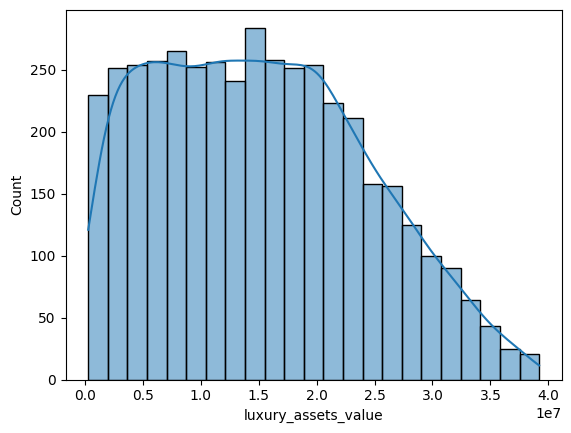

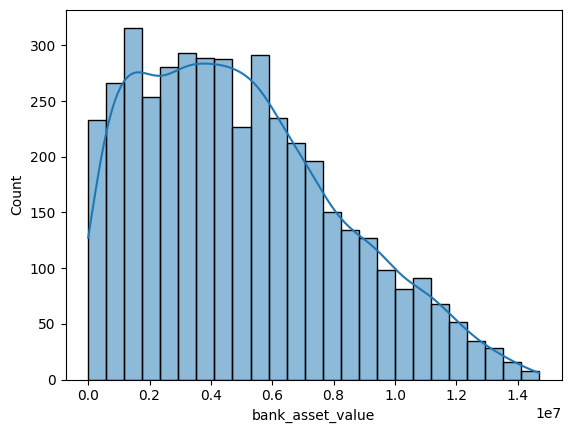

In [295]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_col:
        sns.histplot(df[col],kde=True)
        plt.show()

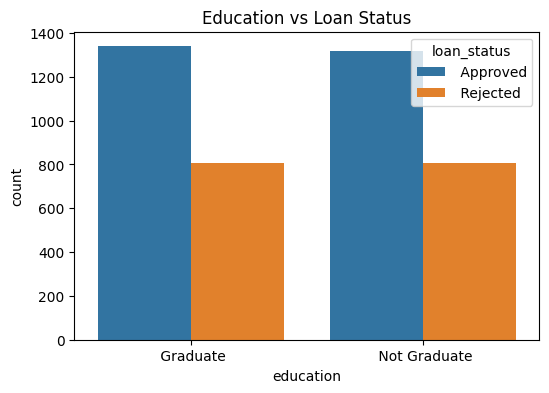

In [296]:
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()


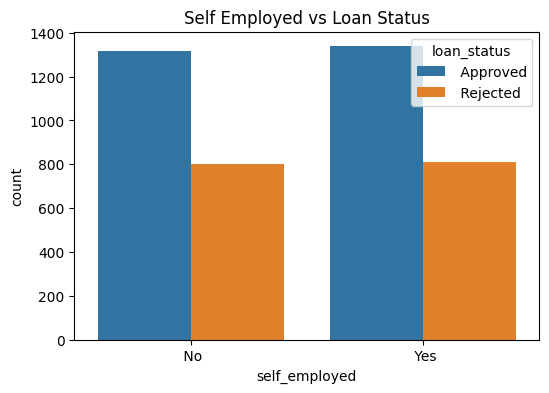

In [297]:
plt.figure(figsize=(6,4))
sns.countplot(x='self_employed', hue='loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()


In [298]:
edu_loan = pd.crosstab(df['education'], df['loan_status'], normalize='index') * 100
print(edu_loan)

loan_status    Approved   Rejected
education                         
Graduate      62.453358  37.546642
Not Graduate  61.976471  38.023529


<Axes: xlabel='no_of_dependents', ylabel='count'>

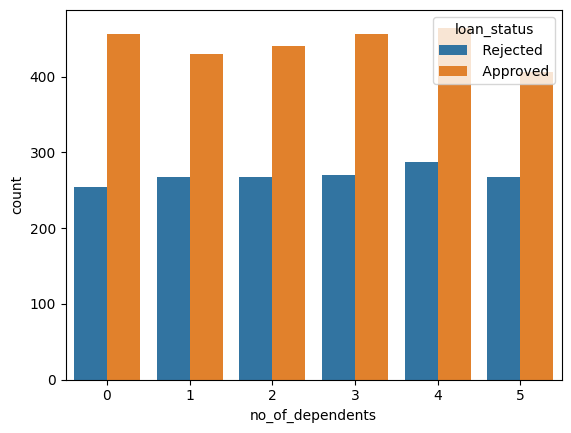

In [299]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status')

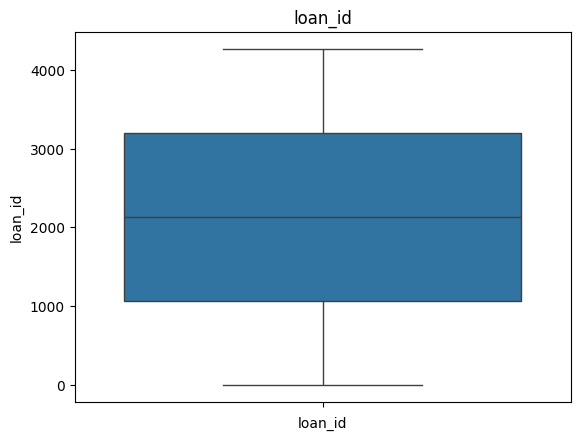

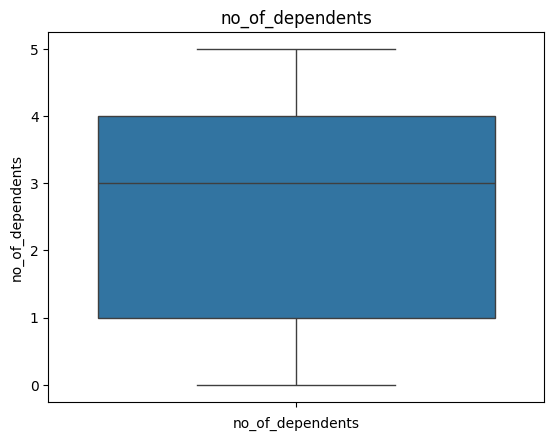

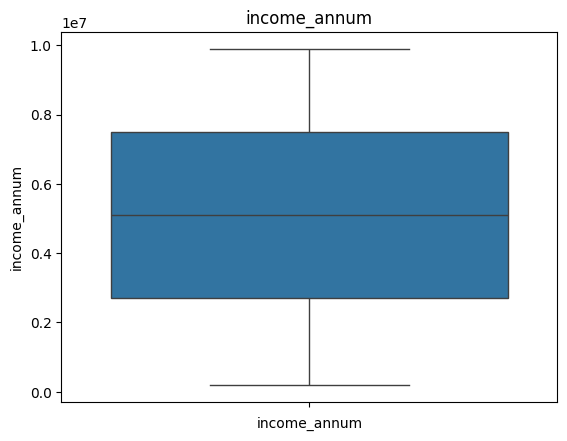

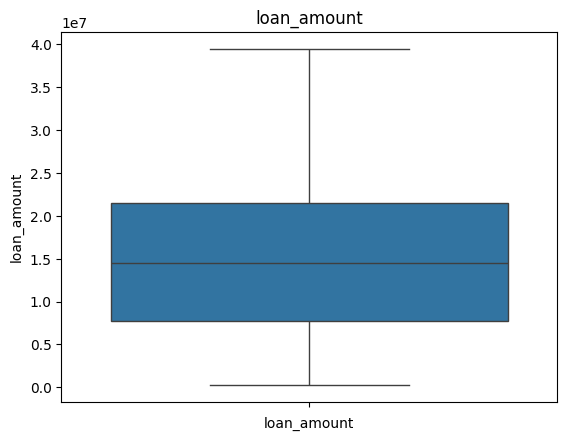

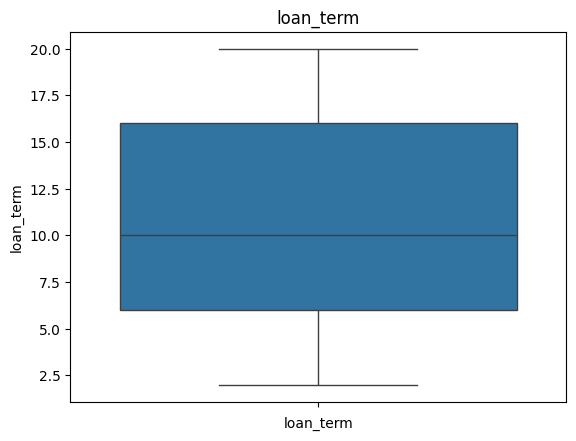

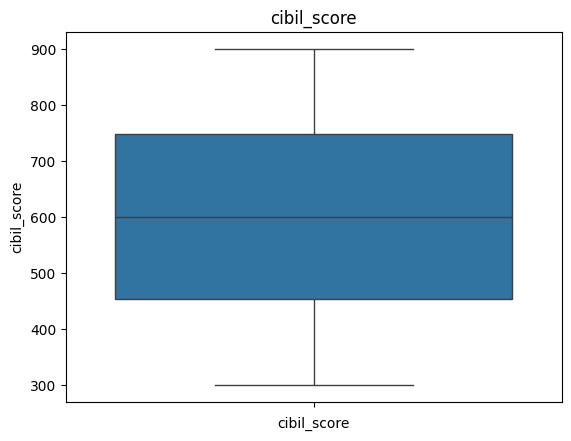

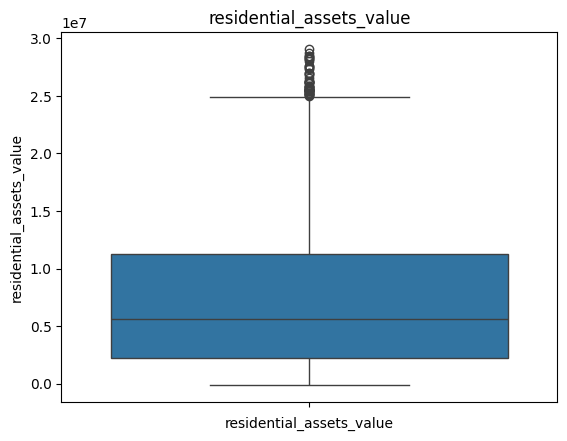

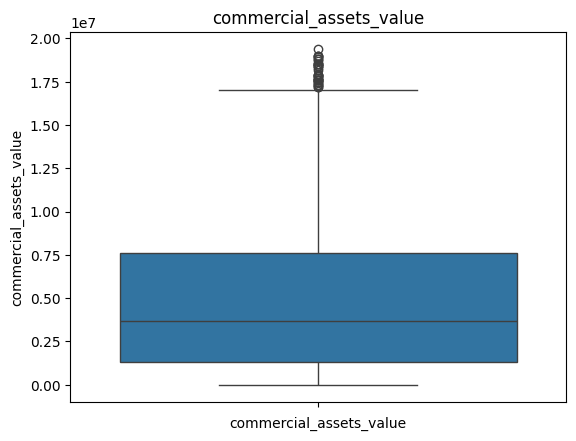

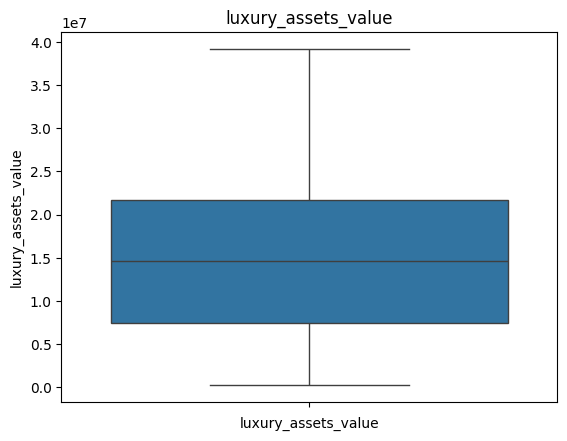

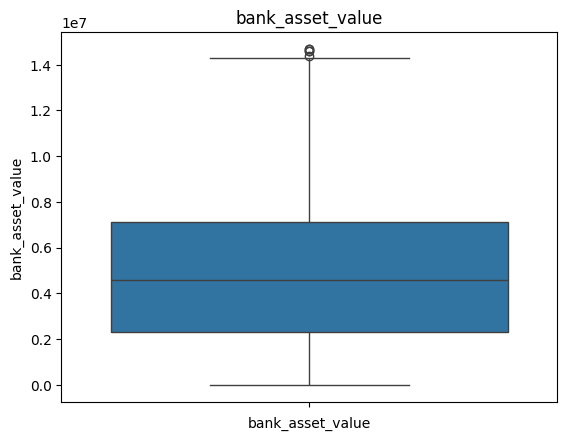

In [300]:
numerical_col = df.select_dtypes(include=['int64','float64']).columns
for col in numerical_col:
  sns.boxplot(df[col])
  plt.title(col)
  plt.xlabel(col)
  plt.show()

In [301]:
le = LabelEncoder()

df['education'] = le.fit_transform(df['education'])         # Graduate=1, Not Graduate=0
df['self_employed'] = le.fit_transform(df['self_employed']) # Yes=1, No=0
df['loan_status'] = le.fit_transform(df['loan_status'])     # Approved=1, Rejected=0


In [302]:
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7295081967213115
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.81       536
           1       0.80      0.36      0.50       318

    accuracy                           0.73       854
   macro avg       0.76      0.66      0.66       854
weighted avg       0.75      0.73      0.70       854



C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


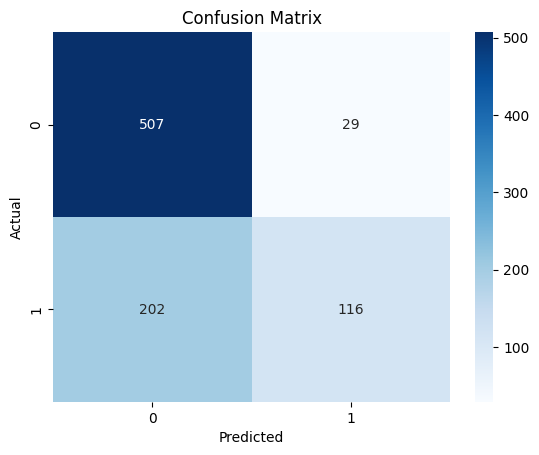

In [303]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

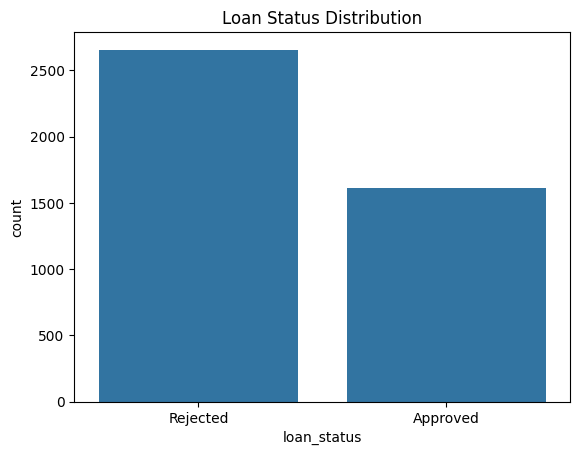

In [304]:
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xticks([0,1], ['Rejected', 'Approved'])
plt.show()

In [305]:
import joblib


In [306]:
joblib.dump(model, 'loan_approval_model.pkl')

['loan_approval_model.pkl']

In [307]:
joblib.load('loan_approval_model.pkl')

LogisticRegression()

In [308]:
import gradio as gr
import numpy as np
import joblib

def predict_loan(dep, edu, emp, income, loan, term, cibil, res, com, lux, bank):
    # Manual encoding
    edu = 1 if edu == "Graduate" else 0
    emp = 1 if emp == "Yes" else 0

    input_data = np.array([[dep, edu, emp, income, loan, term, cibil, res, com, lux, bank]])
    prediction = model.predict(input_data)[0]

    return "✅ Loan Approved!" if prediction == 1 else "❌ Loan Rejected"

inputs = [
    gr.Number(label="No. of Dependents"),
    gr.Dropdown(["Graduate", "Not Graduate"], label="Education"),
    gr.Dropdown(["Yes", "No"], label="Self Employed"),
    gr.Number(label="Annual Income (PKR)"),
    gr.Number(label="Loan Amount"),
    gr.Number(label="Loan Term (Years)"),
    gr.Slider(300, 900, step=1, label="CIBIL Score"),
    gr.Number(label="Residential Asset Value"),
    gr.Number(label="Commercial Asset Value"),
    gr.Number(label="Luxury Asset Value"),
    gr.Number(label="Bank Asset Value"),
]

output = gr.Textbox(label="Prediction Result")

demo = gr.Interface(fn=predict_loan, inputs=inputs, outputs=output, title="Loan Approval Predictor")
demo.launch()


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


In [309]:
n

NameError: name 'n' is not defined